## Final Project Submission

Please fill out:
* Student name: Georgina Sampson
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: FangFang
* Blog post URL:


In [1]:
#which is the biggest contributor to price towards kaggle housing data set?

In [168]:
# Load necessary libraries and import the data
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
plt.style.use('ggplot')
kc_data = pd.read_csv('kc_house_data.csv', index_col=0)

***PREVIEW***

In [162]:
kc_data.isna().sum() #gives us insight to any null values/how many

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [138]:
kc_data.isna().any() #are there any null values and if so which columns?

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [164]:
#Describing a DataFrame. By default only numeric fields are returned.
kc_data.describe()
#okay so the 33 is an outliar because...33 rooms? something must be up. outliars can skew our answer if we're not careful, it will also help make the code more precise i believe 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [166]:
kc_data.corr(method ='pearson')  # find the correlation among the columns.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [139]:
kc_data['waterfront'].fillna(0, inplace=True)
#fill in 0 values for waterfront because you either 
#dont have one or you do. if null is here then we replace it with the
#0 so the computer understands it doesnt have a waterfront 

In [140]:
kc_data['view'].fillna(0, inplace=True) #same logic here

In [141]:
kc_data['yr_renovated'].fillna(0, inplace=True) #same here

In [142]:
kc_data.isna().any()
#got rid of null values by replacing the null values with the colummns mean. the extra.any() 
#just asks again and basically tells us a straight yes or no answer

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

***checking for duplicates***

In [143]:
kc_data.duplicated(subset = ['id']).any()
#now to check for duplicate, are there any in the column 'id'?

True

In [144]:
pd.concat(hey for _, hey in kc_data.groupby("id") if len(hey) > 1)
#we see that there are duplicates and what data the rows hold, so we can decide which duplicate
#to delete and which to drop

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


In [145]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


***DATA CLEANING***

In [146]:
#we see that the houses that have the same ID have only differ by price and date we thought 
#they houses got sold on different dates, therefore we wanted to keep in the last duplicate instead of the first one the appeared 
kc_data.drop_duplicates(subset = 'id',keep='last', inplace =True)

In [147]:
kc_data.duplicated().any()

False

In [148]:
#going into catagorial stuff.. like grade and condition. but this is ahead. we should now look into how to delete
#and obdserve outliars and make boxplots and do some visualizations 
#to see how close we can go now that we've cleaned it

In [149]:
#kc_data['condition'].unique()

In [150]:
#kc_data['grade'].unique()

In [151]:
# because there are three levels, we wnat to create two new columns of dummy variable 
#condition_dummy = pd.get_dummies(kc_data['condition'],prefix = 'condition', drop_first=True)
#grade_dummy = pd.get_dummies(kc_data['grade'],prefix = 'grade', drop_first=True)

In [152]:
#kc_dummies= pd.concat([kc_data, condition_dummy, grade_dummy],axis=1)
#kc_dummies.drop(['condition','grade'],axis=1);

In [153]:
#cor = condition_dummy.corr()

In [154]:
#histograms show us how frequent a variable shows up. we have cleaned our data of null values 

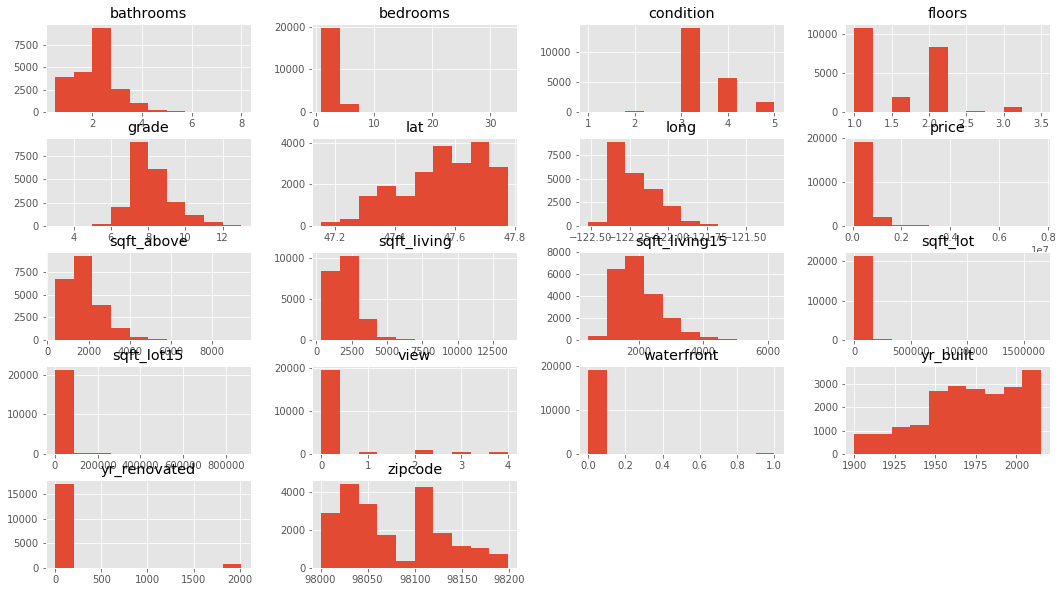

In [170]:
kc_data.hist(figsize=(18,10) );

In [155]:
kc_data.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.701295
grade            0.666835
sqft_above       0.604424
sqft_living15    0.583792
bathrooms        0.525215
view             0.392787
bedrooms         0.309640
lat              0.306439
waterfront       0.264915
floors           0.254972
yr_renovated     0.118278
sqft_lot         0.088789
sqft_lot15       0.082045
yr_built         0.051012
condition        0.034219
long             0.019826
id              -0.018450
zipcode         -0.051169
Name: price, dtype: float64

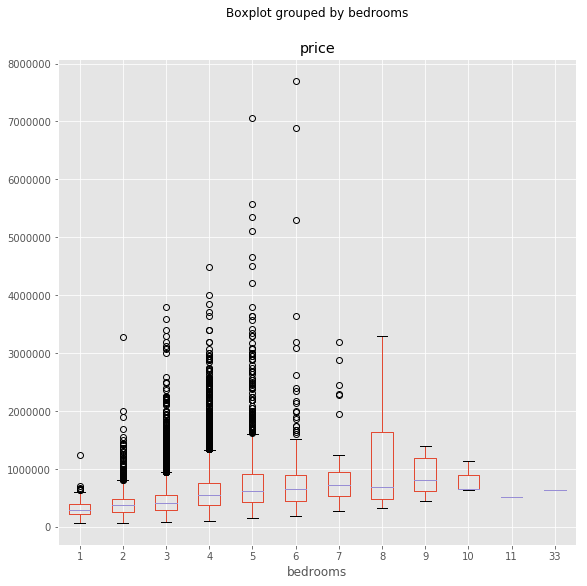

In [156]:
kc_data.boxplot(column='price', by='bedrooms', figsize= (9,9))

In [157]:
kc_data.drop(15856, axis=0, inplace =True)

In [158]:
kc_data['bedrooms'== 33]

KeyError: False

***SPOTTING FOR OUTLIARS***

In [159]:
chart = ols(formula = "price~bathrooms+sqft_living+sqft_above+sqft_living15+grade+floors",data=kc_data).fit()
chart.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     4247.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:16:06   Log-Likelihood:            -2.9647e+05
No. Observations:               21419   AIC:                         5.930e+05
Df Residuals:                   21412   BIC:                         5.930e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.499e+05   1.37e+04    -47.445      0.000   -6.77e+05   -6.23e+05
bathrooms     -3.432e+04   3711.954     -9.247      0.000   -4.16e+04    -2.7e+04
sqft_living     244.5314      4.936     49.538      0.000     234.856     254.207
sqft_above      -79.1848      5.046    -15.691      0.000     -89.076     -69.294
sqft_living15    21.0244      4.096      5.133      0.000      12.995      29.053
grade          1.125e+05   2529.581     44.460      0.000    1.08e+05    1.17e+05
floors        -4468.9204   4245.892     -1.053      0.293   -1.28e+04    3853.346
==============================================================================
Omnibus:                    17091.958   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1113080.416
Skew:                           3.357   Prob(JB):                         0.00
Kurtosis:                      37.672   Cond. No.                     2.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
f = "price~bedrooms+bathrooms+sqft_living+lat+long+yr_built+sqft_lot+floors+view+sqft_above+yr_renovated+waterfront+sqft_living15+sqft_lot15+sqft_basement+condition_dummies+grade_dummies"
regression_kc = ols(formula= f, data=kc_dummies).fit()
regression_kc.summary()

NameError: name 'kc_dummies' is not defined